In [3]:
"""
2025-11-17 Maria Yli-Heikkilä
Plot the results to see how the adjustement works.

Fishy results are those that do not have any overlapping years. No conversion is applied.

"""


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import faostat



# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/adjusted/Food-supply-quantity-kg-capita-yr-2023-notAdjusted.csv'
df = pd.read_csv(fp)
df['Domain'].value_counts()

Domain
New FBS    18593
Old FBS     3455
Name: count, dtype: int64

In [ ]:
#When only those with 4 overlapping years were approved, these were left out:
#New FBS    19047
#Old FBS     5785

In [9]:
# instead of FAOstat API
#myAreaDict2 =  faostat.get_par('FBS', 'area')
#myAreaDictReverse = dict((v, k) for k, v in myAreaDict.items())

# make a dictionary out of the data itself:
myAreaDict = df.set_index('Area').to_dict()['Area Code']
myAreaDictReverse = df.set_index('Area Code').to_dict()['Area']


In [16]:
# In how many cases there are not old data? That is, only one domain? (new data only)
uniqueCases = df[['Area Code', 'Item Code', 'Domain']].drop_duplicates()
tmp = uniqueCases.groupby(['Area Code', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 1])

1826

In [ ]:
# 1826

In [17]:
# In how many cases there are two domains? (But not enough overlapping years)
len(tmp[tmp[0] == 2])

70

In [ ]:
#118

In [18]:
# In how many cases there are old data?
oldCases = uniqueCases[uniqueCases['Domain'] == 'Old FBS'].reset_index()
len(oldCases)

70

In [4]:
#118

In [19]:
uniqueCases['Domain'].value_counts()

Domain
New FBS    1896
Old FBS      70
Name: count, dtype: int64

In [ ]:
#Domain
#New FBS    1944
#Old FBS     118

In [15]:


#### FUNC:

def plotting77(data, mycountryCode, myElement, myItemCode, startingYear, axes):
    mycountry = myAreaDictReverse.get(mycountryCode)
    # Subset data:
    data22 = data[(data['Area Code'] == mycountryCode) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    #exclude BiasCorrectedAdjusted:
    data2 = data22[~(data22['Domain'] == 'BiasCorrectedAdjusted')]
    
    if data2.empty:
        print(f'Empty dataset for {mycountry}, {myItemCode}')
    
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
        
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2
        
        
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]

    myItem = data3['Item'].values[0]
        
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    



/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_29479/2863939308.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))


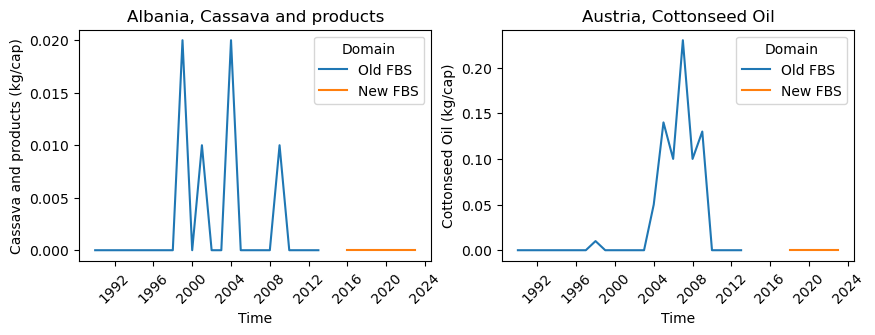

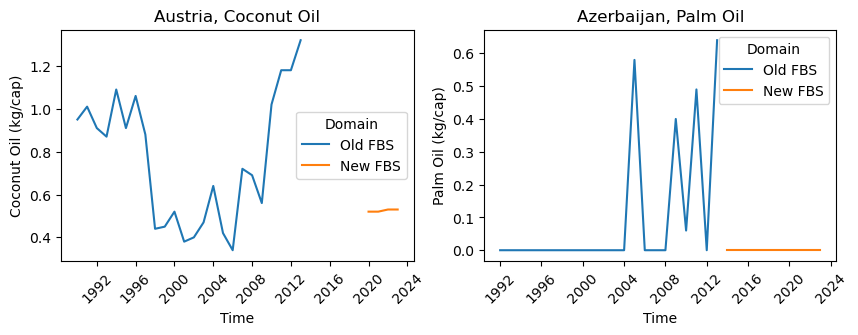

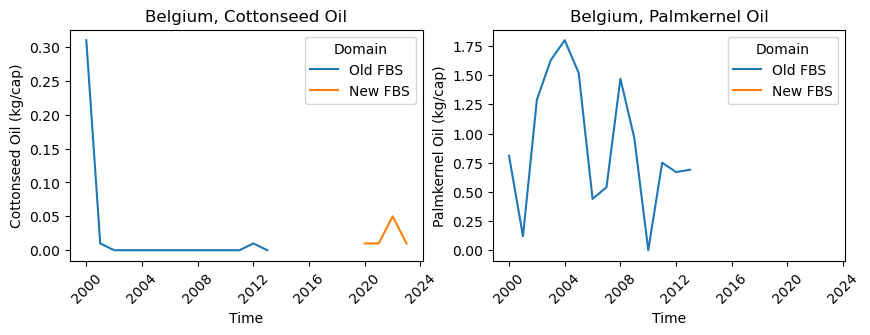

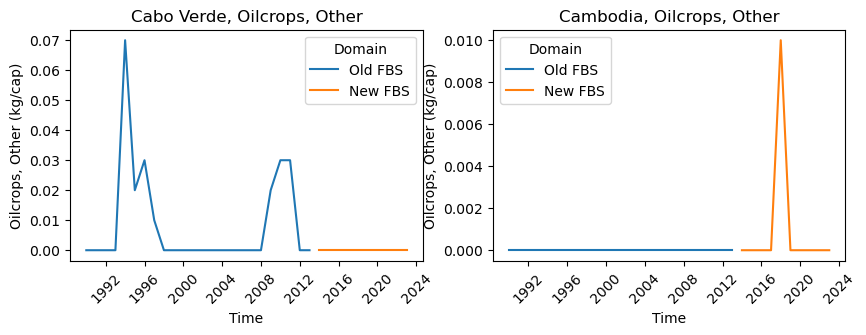

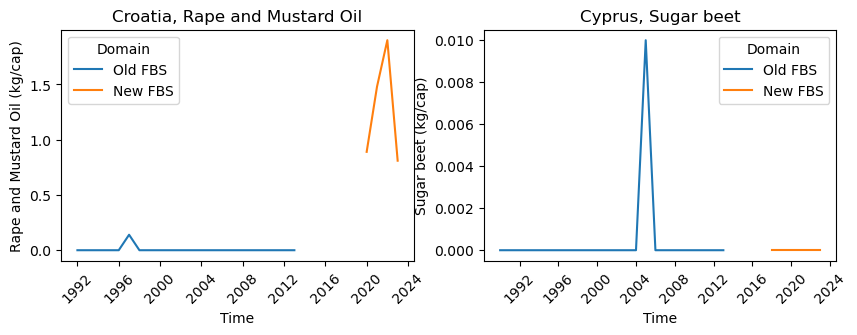

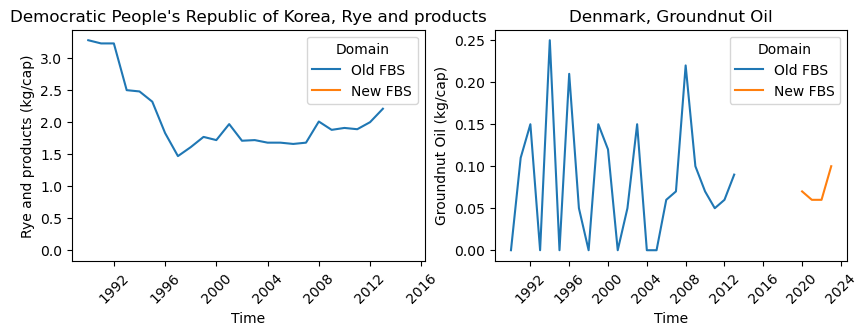

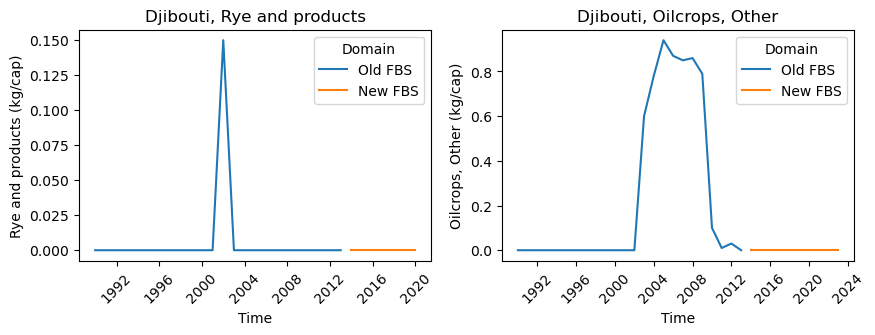

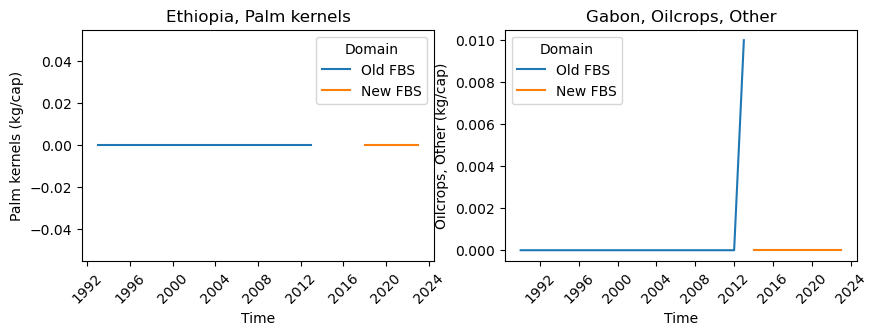

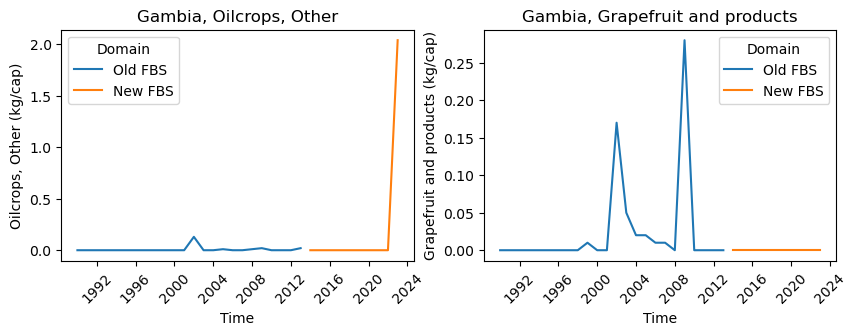

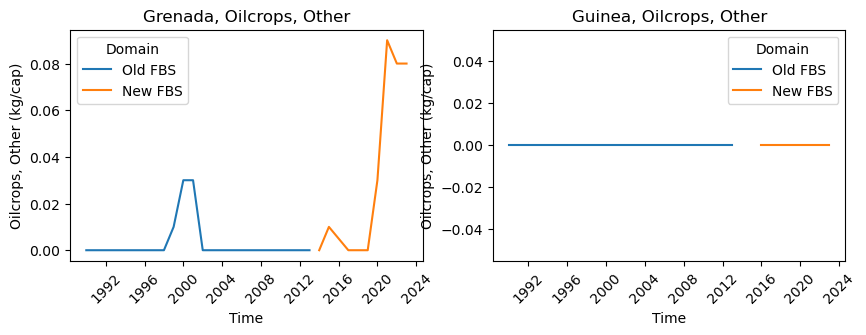

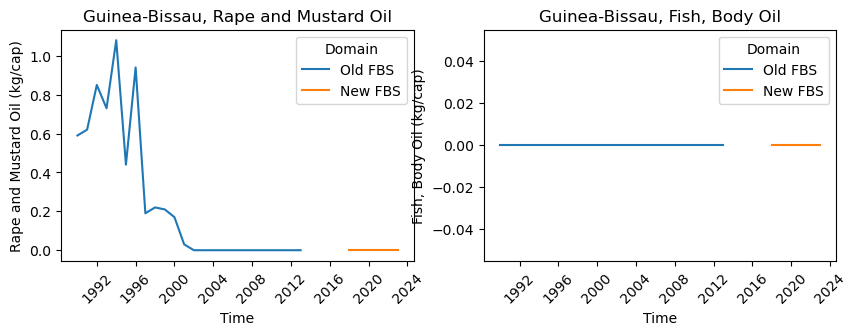

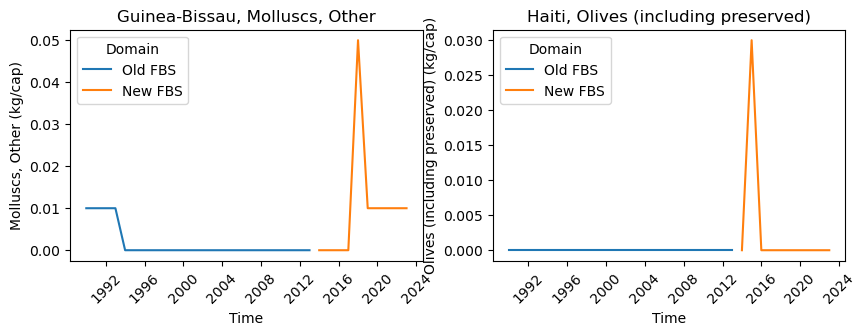

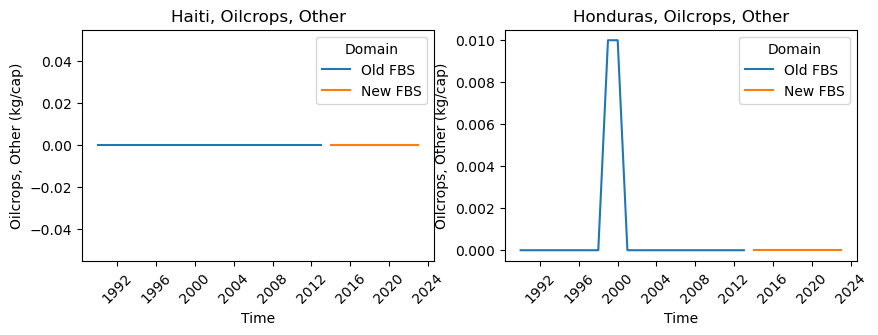

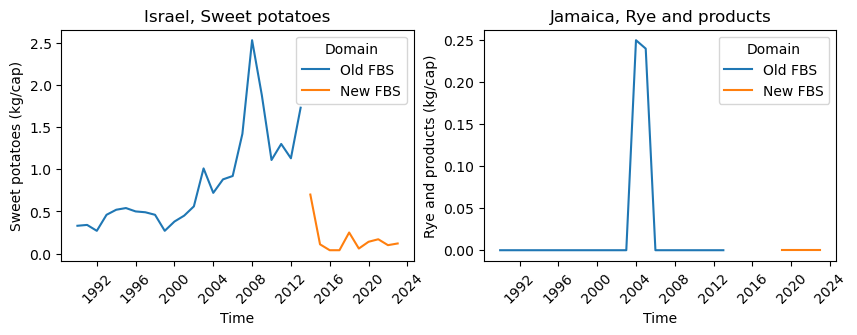

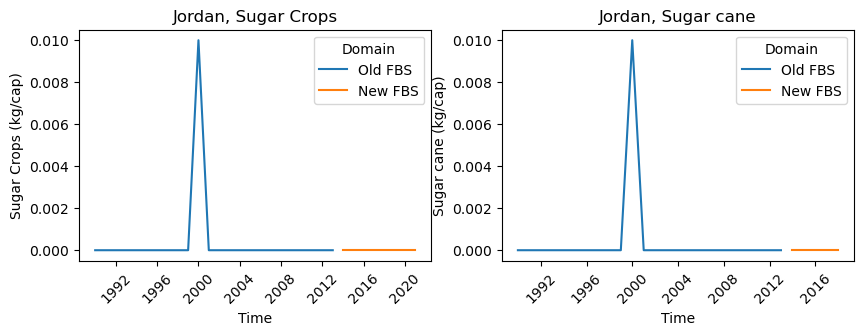

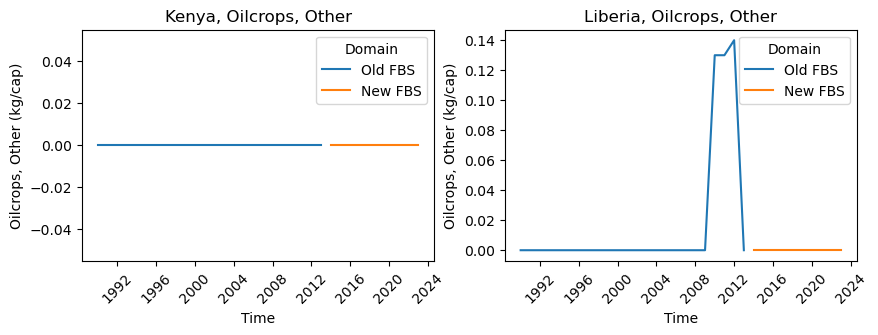

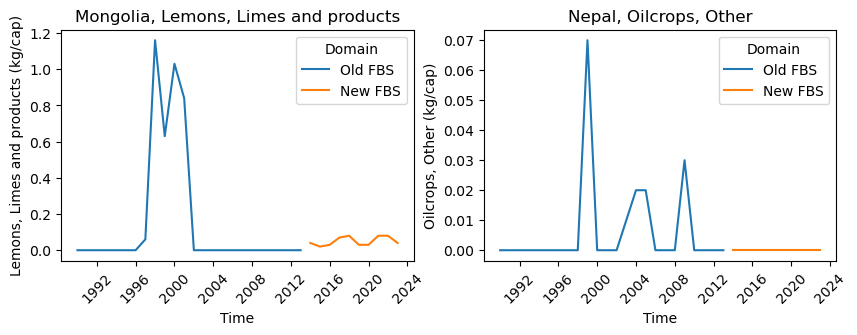

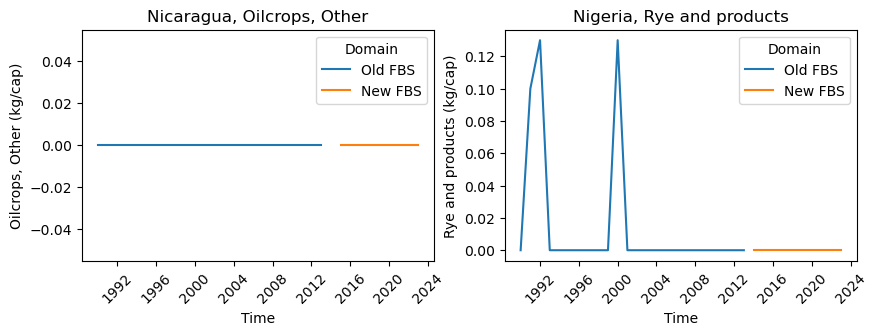

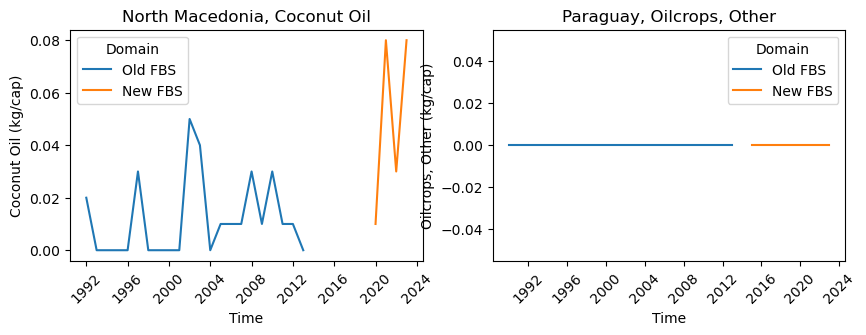

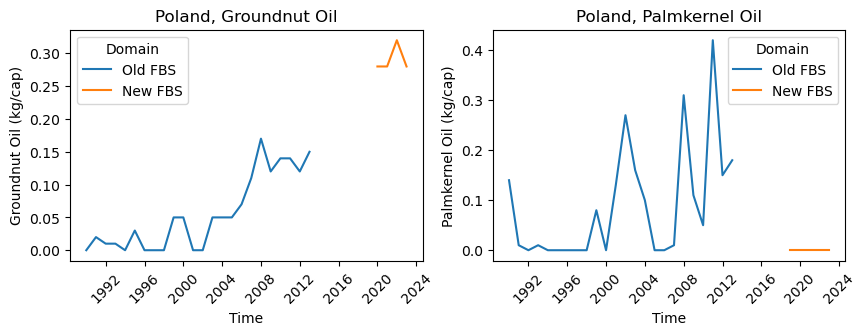

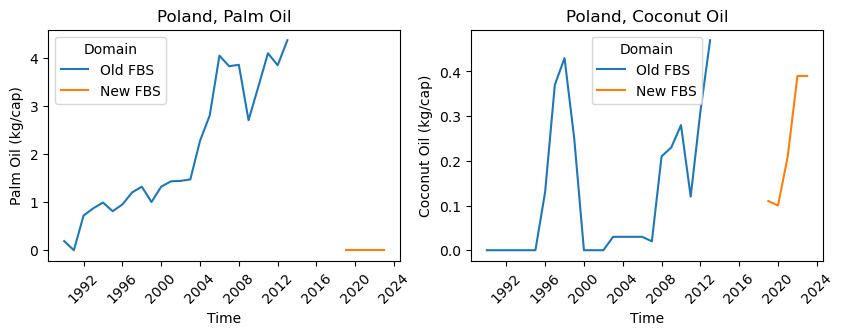

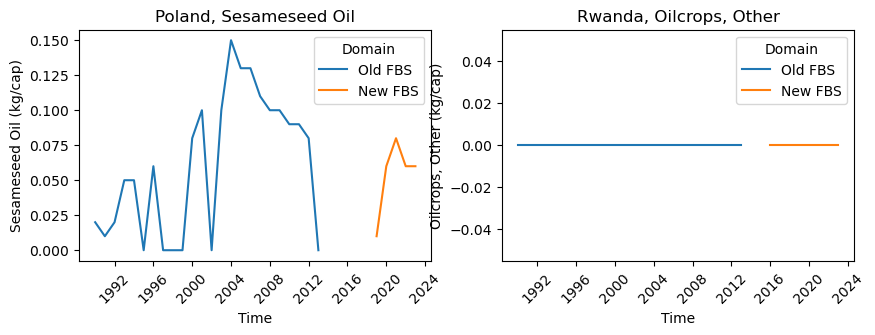

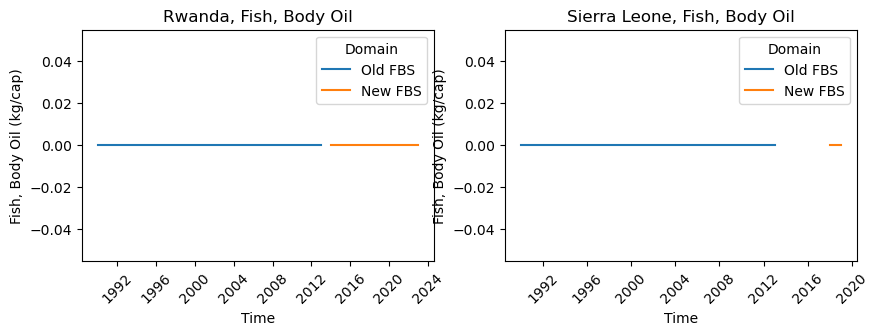

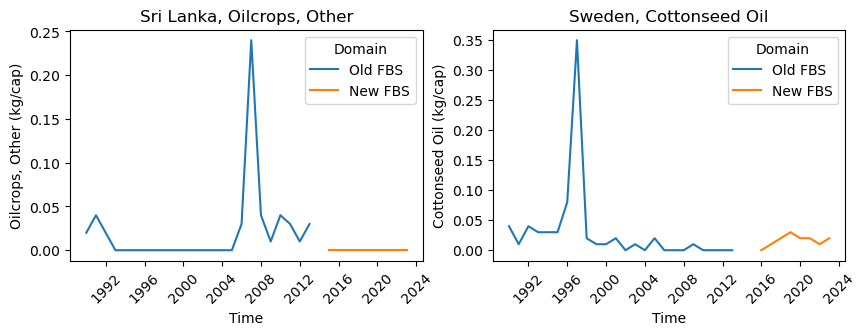

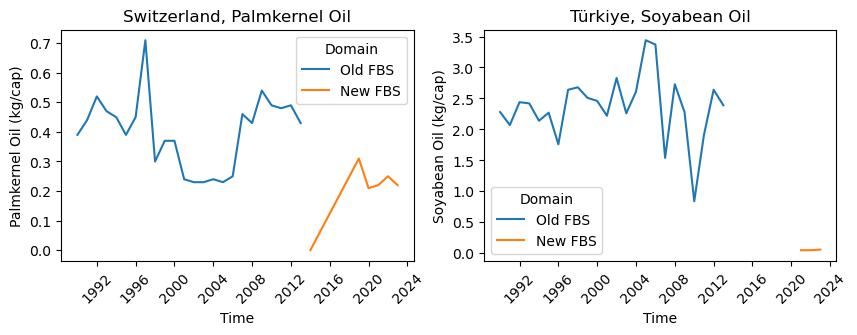

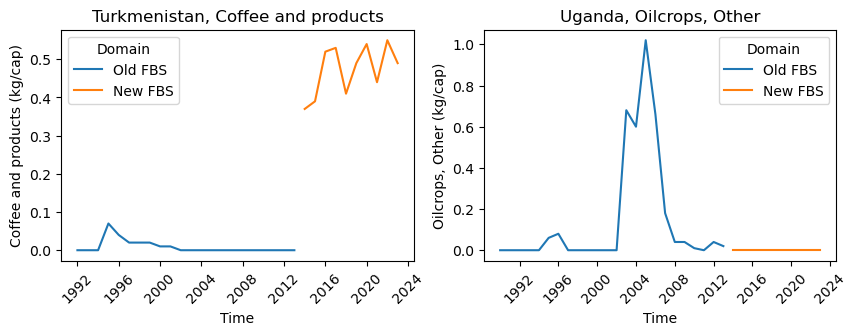

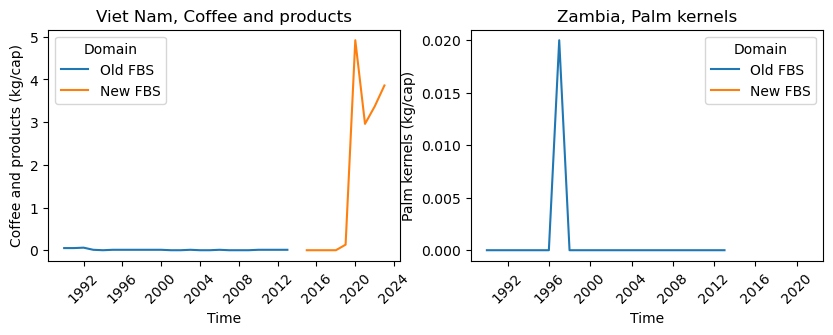

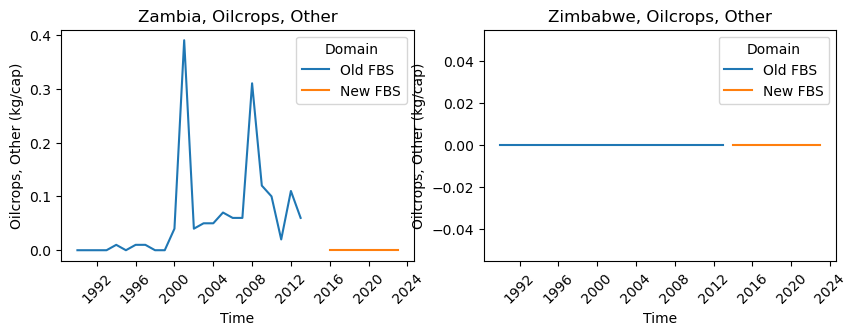

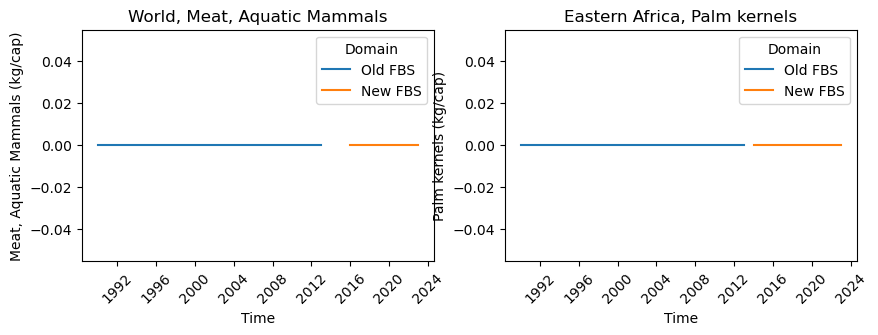

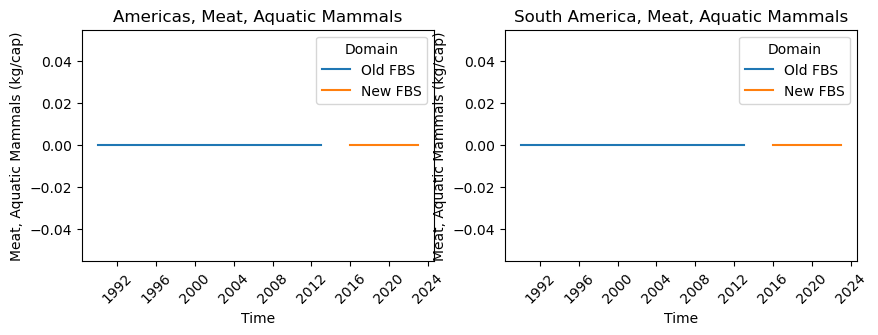

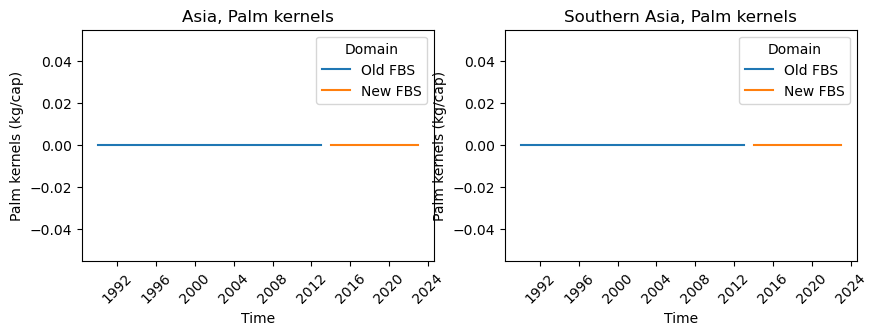

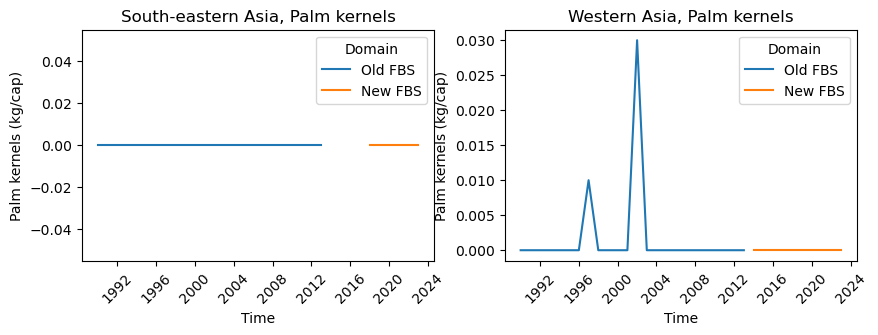

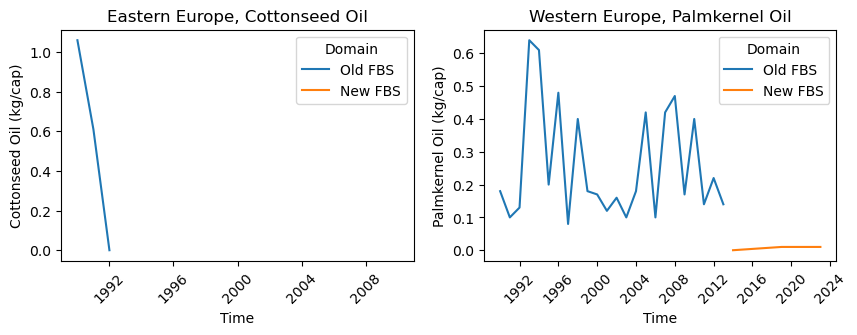

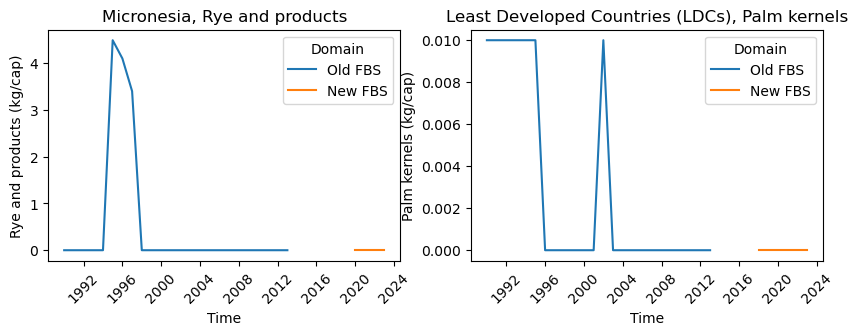

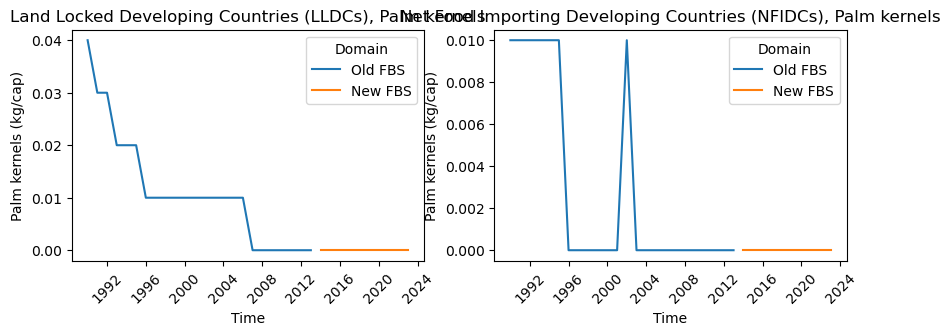

In [21]:
for i in range(0, len(oldCases), 2):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

    mycountry = oldCases.iloc[i]['Area Code']
    myItemCode = oldCases.iloc[i]['Item Code']
    myElement = 'Food supply quantity (kg/capita/yr)'
    #print(myItemCode, mycountry)
    plotting77(df, mycountry, myElement, myItemCode, 1990, ax1)
    mycountry = oldCases.iloc[i+1]['Area Code']
    myItemCode = oldCases.iloc[i+1]['Item Code']
    
    plotting77(df, mycountry, myElement, myItemCode, 1990, ax2)

    #plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
    plt.show